## Univariate Analysis

#### Data Preprocessing

In [81]:
#this is where we perform the univariate analysis
import pandas as pandafordata
import matplotlib.pyplot as mplforplotting
import seaborn as seabornforvis
import numpy as numpyfornumbers

In [82]:
df = pandafordata.read_csv("../Data/Transformed_Student_Performence_Data.csv")
df.head() #here is where we start off by importing the dataset and getting a quick glance at our data

,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
0,19.833723,7,1,2,0,0,1,0,2
1,15.408756,0,0,1,0,0,0,0,1
2,4.210570,26,0,2,0,0,0,0,4
3,10.028829,14,0,3,1,0,0,0,3
4,4.672495,17,1,3,0,0,0,0,4


#### Data Overview

In [83]:
df.describe()#this is to describe the data and provide us with a broad overview of what we are dealing with. For this EDA univariate analysis, we will be focusing on GPA.


,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,3.071070
std,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,1.177639
min,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,4.000000
max,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [84]:
df.dtypes # this gives us insight into the data types present in our dataset
df.info() # this gives more info as well as a count of null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   StudyTimeWeekly  2392 non-null   float64
 1   Absences         2392 non-null   int64  
 2   Tutoring         2392 non-null   int64  
 3   ParentalSupport  2392 non-null   int64  
 4   Extracurricular  2392 non-null   int64  
 5   Sports           2392 non-null   int64  
 6   Music            2392 non-null   int64  
 7   Volunteering     2392 non-null   int64  
 8   GradeClass       2392 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 168.3 KB


#### Boxplot

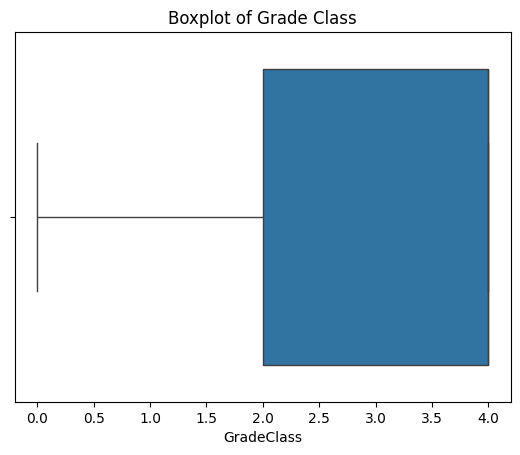

In [85]:
seabornforvis.boxplot(x=df['GradeClass'])
mplforplotting.title('Boxplot of Grade Class')
mplforplotting.show()
#this visualisation is to help us see the spread of data points within the range

In [86]:
def detect_outliers_iqr(data, column= 'GradeClass'):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

outliers = detect_outliers_iqr(df, 'GradeClass')
print(outliers)
# the output below shows us the absence of outliers.

Empty DataFrame
Columns: [StudyTimeWeekly, Absences, Tutoring, ParentalSupport, Extracurricular, Sports, Music, Volunteering, GradeClass]
Index: []


#### Histogram

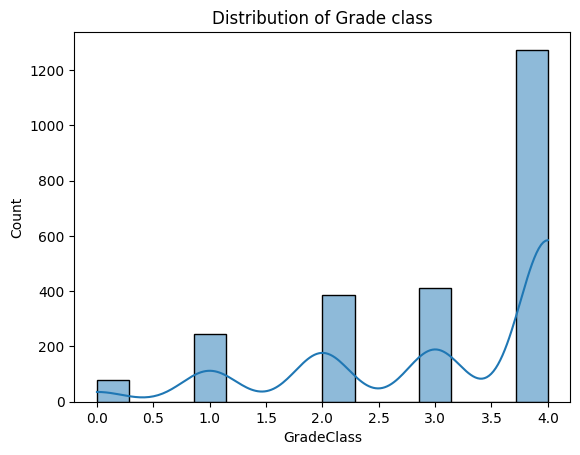

count    2392.000000
mean        3.071070
std         1.177639
min         0.000000
25%         2.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: GradeClass, dtype: float64


In [87]:
seabornforvis.histplot(df['GradeClass'], kde=True)
mplforplotting.title('Distribution of Grade class')
mplforplotting.show()
#this visualisation is to help show the spread of students within the grade classes

print(df['GradeClass'].describe())# this allows us to hone in on the target variable

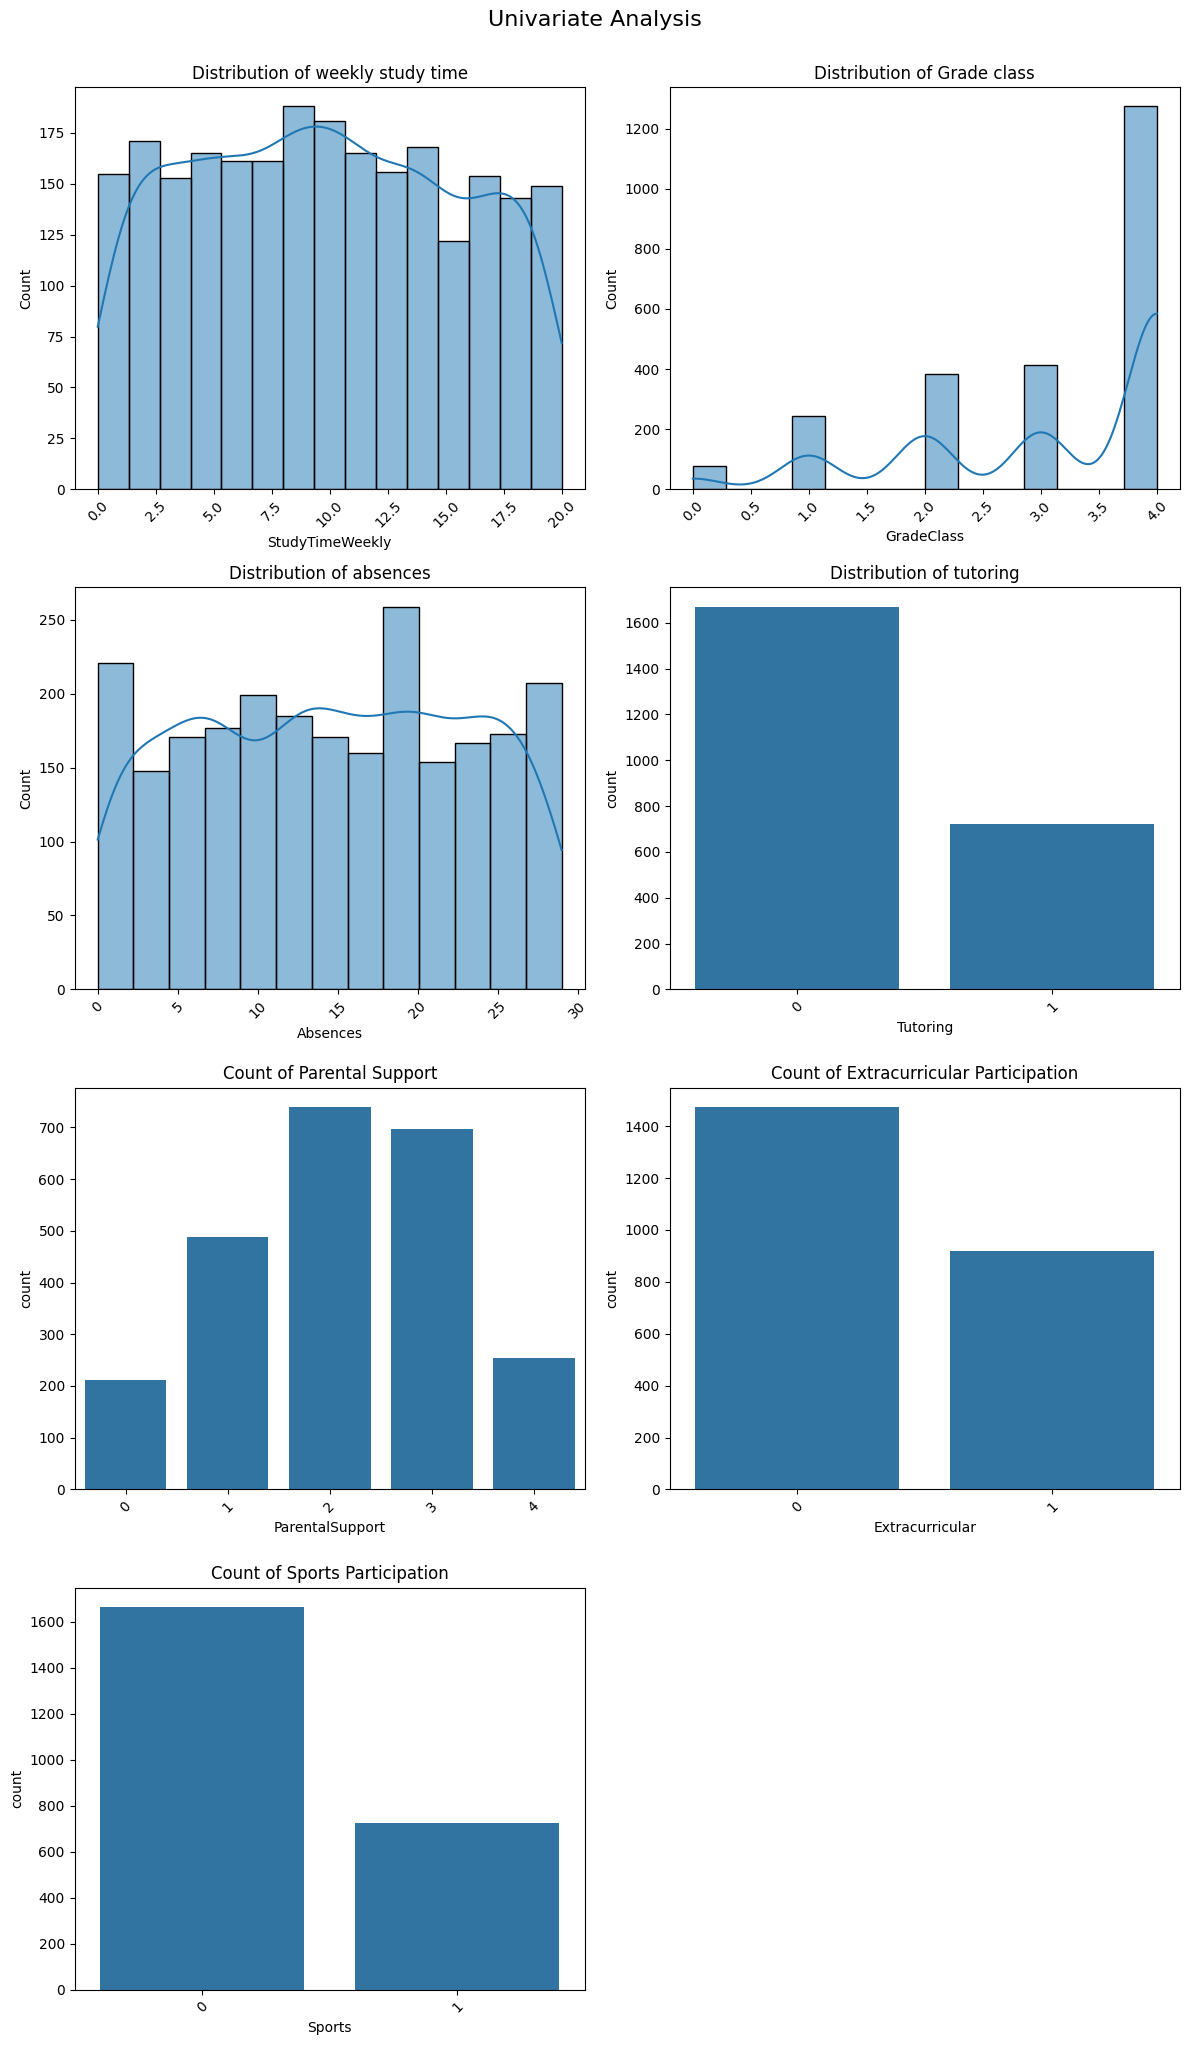

In [88]:
fig, axes = mplforplotting.subplots(nrows=4, ncols=2, figsize=(12, 20))
axes = axes.flatten()

#here we will create histograms for all attributes except music and volunteering and music
seabornforvis.histplot(df['StudyTimeWeekly'], kde=True, ax=axes[0])
mplforplotting.title('Distribution of weekly study time')
axes[0].set_title('Distribution of weekly study time')
axes[0].tick_params(axis='x', rotation=45)

seabornforvis.histplot(df['GradeClass'], kde=True, ax=axes[1])
mplforplotting.title('Distribution of Grade class')
axes[1].set_title('Distribution of Grade class')
axes[1].tick_params(axis='x', rotation=45)

seabornforvis.histplot(df['Absences'], kde=True, ax=axes[2])
mplforplotting.title('Distribution of absences')
axes[2].set_title('Distribution of absences')
axes[2].tick_params(axis='x', rotation=45)

seabornforvis.countplot(x='Tutoring', data=df, ax=axes[3])
mplforplotting.title('Distribution of tutoring')
axes[3].set_title('Distribution of tutoring')
axes[3].tick_params(axis='x', rotation=45)

seabornforvis.countplot(x='ParentalSupport', data=df, ax=axes[4])
mplforplotting.title('Count of Parental Support')
axes[4].set_title('Count of Parental Support')
axes[4].tick_params(axis='x', rotation=45)

seabornforvis.countplot(x='Extracurricular', data=df, ax=axes[5])
mplforplotting.title('Count of Extracurricular Participation')
axes[5].set_title('Count of Extracurricular Participation')
axes[5].tick_params(axis='x', rotation=45)

seabornforvis.countplot(x='Sports', data=df, ax=axes[6])
mplforplotting.title('Count of Sports Participation')
axes[6].set_title('Count of Sports Participation')
axes[6].tick_params(axis='x', rotation=45)

axes[7].axis('off')
axes[7].set_title('')

mplforplotting.tight_layout()
mplforplotting.suptitle("Univariate Analysis", fontsize=16, y=1.02)
mplforplotting.show()